# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [9]:
# Import your libraries:

%matplotlib inline

import numpy as np
import pandas as pd

In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:

In [10]:
websites = pd.read_csv('../data/website.csv')

#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for your explorations. Make sure to comment what you find out.

In [11]:
# Your code here
#websites.shape = 21 columns 1782 rows
#websites.describe()
#websites.dtypes
#websites.isna().sum()
websites.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,None,None,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,None,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0


In [4]:
# Your comment here
shape = 21 columns 1782 rows


URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
CONTENT_LENGTH               float64
WHOIS_COUNTRY                 object
WHOIS_STATEPRO                object
WHOIS_REGDATE                 object
WHOIS_UPDATED_DATE            object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64

Nulls in:
SERVER                         1
CONTENT_LENGTH               812
DNS_QUERY_TIMES                1

SyntaxError: invalid syntax (<ipython-input-4-24c3a325dbde>, line 2)

#### Next, evaluate if the columns in this dataset are strongly correlated.

If our dataset has strongly correlated columns, we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the next cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

[Text(0.5, 0, 'URL_LENGTH'),
 Text(1.5, 0, 'NUMBER_SPECIAL_CHARACTERS'),
 Text(2.5, 0, 'CONTENT_LENGTH'),
 Text(3.5, 0, 'TCP_CONVERSATION_EXCHANGE'),
 Text(4.5, 0, 'DIST_REMOTE_TCP_PORT'),
 Text(5.5, 0, 'REMOTE_IPS'),
 Text(6.5, 0, 'APP_BYTES'),
 Text(7.5, 0, 'SOURCE_APP_PACKETS'),
 Text(8.5, 0, 'REMOTE_APP_PACKETS'),
 Text(9.5, 0, 'SOURCE_APP_BYTES'),
 Text(10.5, 0, 'REMOTE_APP_BYTES'),
 Text(11.5, 0, 'APP_PACKETS'),
 Text(12.5, 0, 'DNS_QUERY_TIMES'),
 Text(13.5, 0, 'Type')]

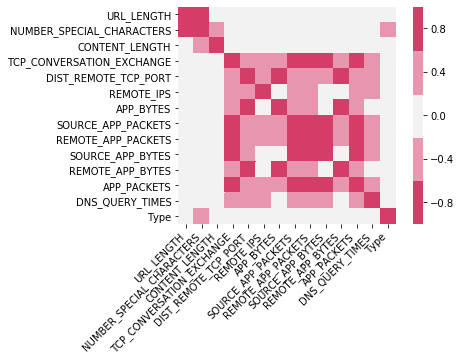

In [12]:
# Your code here
import seaborn as sns


corr = websites.corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(0, 0, n=5), #n= is just the number of steps
    #cmap=sns.diverging_palette(90, 210, n=600), 
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
#plt.figtext(0.90,0.5, websites.corr().to_string())

In [6]:
# Your comment here
TCP_CONVERSATION_EXCHANGE Vs.
'SOURCE_APP_PACKETS'
'REMOTE_APP_PACKETS'
'SOURCE_APP_BYTES'

SyntaxError: invalid syntax (<ipython-input-6-11c22bba8e25>, line 2)

# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

[Text(0.5, 0, 'URL_LENGTH'),
 Text(1.5, 0, 'CONTENT_LENGTH'),
 Text(2.5, 0, 'DIST_REMOTE_TCP_PORT'),
 Text(3.5, 0, 'REMOTE_IPS'),
 Text(4.5, 0, 'APP_BYTES'),
 Text(5.5, 0, 'REMOTE_APP_PACKETS'),
 Text(6.5, 0, 'DNS_QUERY_TIMES'),
 Text(7.5, 0, 'Type')]

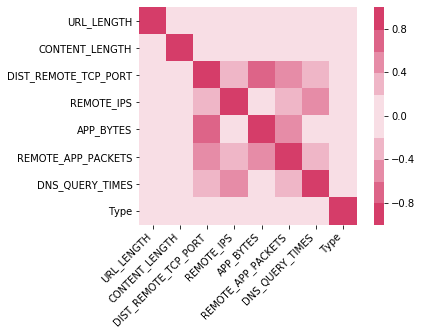

In [14]:
# Your code here
df_working = websites
df_working.drop(['NUMBER_SPECIAL_CHARACTERS'], axis=1)
#Added one feature at a tme to ensure high correlation disappeared 
corr = df_working.drop(['NUMBER_SPECIAL_CHARACTERS','SOURCE_APP_PACKETS','TCP_CONVERSATION_EXCHANGE','SOURCE_APP_BYTES','REMOTE_APP_BYTES','APP_PACKETS'], axis=1).corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(0, 0, n=10), #n= is just the number of steps
    #cmap=sns.diverging_palette(90, 210, n=600), 
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

In [ ]:
# Your comment here

In [ ]:
# Print heatmap again


# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [15]:
# Your code here
df_working.drop(['NUMBER_SPECIAL_CHARACTERS','SOURCE_APP_PACKETS','TCP_CONVERSATION_EXCHANGE','SOURCE_APP_BYTES','REMOTE_APP_BYTES','APP_PACKETS'], axis=1).isna().sum()

URL                       0
URL_LENGTH                0
CHARSET                   0
SERVER                    1
CONTENT_LENGTH          812
WHOIS_COUNTRY             0
WHOIS_STATEPRO            0
WHOIS_REGDATE             0
WHOIS_UPDATED_DATE        0
DIST_REMOTE_TCP_PORT      0
REMOTE_IPS                0
APP_BYTES                 0
REMOTE_APP_PACKETS        0
DNS_QUERY_TIMES           1
Type                      0
dtype: int64

If you remember in the previous labs, we drop a column if the column contains a high proportion of missing values. After dropping those problematic columns, we drop the rows with missing values.

#### In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.

In [16]:
# Your code here
df_clean = df_working.drop(['NUMBER_SPECIAL_CHARACTERS','SOURCE_APP_PACKETS','TCP_CONVERSATION_EXCHANGE','SOURCE_APP_BYTES','REMOTE_APP_BYTES','APP_PACKETS'], axis=1)
df_clean.drop(['CONTENT_LENGTH'] , axis =1, inplace=True )
df_clean.info()
#df_clean.dropna(subset=['SERVER'], inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 14 columns):
URL                     1781 non-null object
URL_LENGTH              1781 non-null int64
CHARSET                 1781 non-null object
SERVER                  1780 non-null object
WHOIS_COUNTRY           1781 non-null object
WHOIS_STATEPRO          1781 non-null object
WHOIS_REGDATE           1781 non-null object
WHOIS_UPDATED_DATE      1781 non-null object
DIST_REMOTE_TCP_PORT    1781 non-null int64
REMOTE_IPS              1781 non-null int64
APP_BYTES               1781 non-null int64
REMOTE_APP_PACKETS      1781 non-null int64
DNS_QUERY_TIMES         1780 non-null float64
Type                    1781 non-null int64
dtypes: float64(1), int64(6), object(7)
memory usage: 194.9+ KB


In [ ]:
# Your comment here
Dropped content as probably not useful and also dropped row in server with null value


#### Again, examine the number of missing values in each column. 

If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [17]:
# Examine missing values in each column
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 14 columns):
URL                     1781 non-null object
URL_LENGTH              1781 non-null int64
CHARSET                 1781 non-null object
SERVER                  1780 non-null object
WHOIS_COUNTRY           1781 non-null object
WHOIS_STATEPRO          1781 non-null object
WHOIS_REGDATE           1781 non-null object
WHOIS_UPDATED_DATE      1781 non-null object
DIST_REMOTE_TCP_PORT    1781 non-null int64
REMOTE_IPS              1781 non-null int64
APP_BYTES               1781 non-null int64
REMOTE_APP_PACKETS      1781 non-null int64
DNS_QUERY_TIMES         1780 non-null float64
Type                    1781 non-null int64
dtypes: float64(1), int64(6), object(7)
memory usage: 194.9+ KB


# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [18]:
#OPTION 1
df_clean.WHOIS_COUNTRY.replace({'Cyprus':'CY','us':'US','se':'SE','United Kingdom':'UK',"[u'GB'; u'UK']":'UK','GB':'UK','ru':'RU'})


0       None
1       None
2       None
3         US
4         US
5         SC
6         US
7         US
8       None
9       None
10        US
11        US
12        UK
13      None
14      None
15        UK
16        RU
17      None
18      None
19        US
20        US
21        US
22      None
23        AU
24        US
25        US
26        US
27        CA
28        US
29        PA
        ... 
1751      US
1752      ES
1753      ES
1754      US
1755    None
1756      ES
1757      ES
1758      ES
1759      US
1760      ES
1761      ES
1762      US
1763      CA
1764      ES
1765      ES
1766      US
1767      ES
1768      US
1769    None
1770      BS
1771      ES
1772      ES
1773      ES
1774      US
1775      ES
1776      ES
1777      ES
1778      US
1779      US
1780      US
Name: WHOIS_COUNTRY, Length: 1781, dtype: object

In [26]:
# Your code here
#OPTION 2
df_clean.WHOIS_COUNTRY.unique()

def cleancountry(row):
    if row['WHOIS_COUNTRY'] == 'Cyprus':
        return 'CY' 
    elif row['WHOIS_COUNTRY'] == 'us':
        return 'US' 
    elif row['WHOIS_COUNTRY'] == 'se':
        return 'SE' 
    elif row['WHOIS_COUNTRY'] == 'United Kingdom':
        return 'UK' 
    elif row['WHOIS_COUNTRY'] == "[u'GB'; u'UK']":
        return 'UK' 
    elif row['WHOIS_COUNTRY'] == 'GB':
        return 'UK' 
    elif row['WHOIS_COUNTRY'] == 'ru':
        return 'RU' 
    else:
        return row['WHOIS_COUNTRY']
    
df_clean['WHOIS_COUNTRY_cl'] = df_clean.apply(cleancountry ,axis=1)

df_clean.WHOIS_COUNTRY_cl.unique()
df_clean.WHOIS_COUNTRY_cl.value_counts()
#there are 306 'none' countries. Will drop them
dfx = df_clean[df_clean.WHOIS_COUNTRY_cl != 'None']
dfx.WHOIS_COUNTRY_cl.value_counts()

US    1106
CA      84
ES      63
AU      35
UK      35
PA      21
JP      11
CN      10
IN      10
FR       9
CZ       9
RU       6
NL       6
CH       6
KR       5
AT       4
PH       4
SE       4
BS       4
TR       3
BE       3
DE       3
KY       3
SC       3
HK       3
UY       2
SI       2
IL       2
UA       2
BR       2
CY       2
NO       2
KG       2
IT       1
LU       1
UG       1
AE       1
TH       1
BY       1
IE       1
LV       1
PK       1
Name: WHOIS_COUNTRY_cl, dtype: int64

In [27]:
#df_clean['WHOIS_COUNTRY_cl'] = df_clean.apply(cleancountry ,axis=1)

#df_clean.WHOIS_COUNTRY_cl.unique()
#df_clean.WHOIS_COUNTRY_cl.value_counts()
#there are 306 'none' countries. Will drop them
dfx = df_clean[df_clean.WHOIS_COUNTRY != 'None']
dfx.WHOIS_COUNTRY_cl.value_counts()

US    1106
CA      84
ES      63
AU      35
UK      35
PA      21
JP      11
CN      10
IN      10
FR       9
CZ       9
RU       6
NL       6
CH       6
KR       5
AT       4
PH       4
SE       4
BS       4
TR       3
BE       3
DE       3
KY       3
SC       3
HK       3
UY       2
SI       2
IL       2
UA       2
BR       2
CY       2
NO       2
KG       2
IT       1
LU       1
UG       1
AE       1
TH       1
BY       1
IE       1
LV       1
PK       1
Name: WHOIS_COUNTRY_cl, dtype: int64

Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

In [28]:
# Your code here
dfx.WHOIS_COUNTRY_cl.value_counts().index

#dfx['WHOIS_COUNTRY_cl'].apply(pd.value_counts).plot.pie(subplots=True)

Index(['US', 'CA', 'ES', 'AU', 'UK', 'PA', 'JP', 'CN', 'IN', 'FR', 'CZ', 'RU',
       'NL', 'CH', 'KR', 'AT', 'PH', 'SE', 'BS', 'TR', 'BE', 'DE', 'KY', 'SC',
       'HK', 'UY', 'SI', 'IL', 'UA', 'BR', 'CY', 'NO', 'KG', 'IT', 'LU', 'UG',
       'AE', 'TH', 'BY', 'IE', 'LV', 'PK'],
      dtype='object')

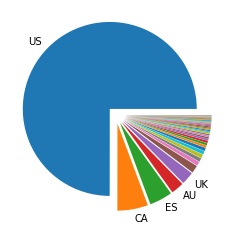

In [29]:
import matplotlib.pyplot as plt
labels = list(dfx.WHOIS_COUNTRY_cl.value_counts().index[0:5]) + [''] * (len(dfx.WHOIS_COUNTRY_cl.value_counts())-5)

plt.pie( dfx.WHOIS_COUNTRY_cl.value_counts(), explode=([.1] * len(dfx.WHOIS_COUNTRY_cl.value_counts())) , labels =labels )
plt.show()
    

#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

In [30]:
# Your code here
dfx['cuntry'] = dfx['WHOIS_COUNTRY_cl'].apply(lambda x: 'OTHER' if x not in ['US','CA','ES','AU','UK','PA','JP','IN','CN','FR'] else x)
dfx['cuntry'].value_counts()


C:\Users\ellio\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


US       1106
OTHER      91
CA         84
ES         63
AU         35
UK         35
PA         21
JP         11
CN         10
IN         10
FR          9
Name: cuntry, dtype: int64

Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [60]:
# Your code here
dfx2 = dfx.drop(['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE','WHOIS_COUNTRY_cl','WHOIS_COUNTRY'], axis=1)

# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [61]:
# Your code here
dfx2.dtypes

URL                      object
URL_LENGTH                int64
CHARSET                  object
SERVER                   object
DIST_REMOTE_TCP_PORT      int64
REMOTE_IPS                int64
APP_BYTES                 int64
REMOTE_APP_PACKETS        int64
DNS_QUERY_TIMES         float64
Type                      int64
cuntry                   object
dtype: object

#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [62]:
# Your code here
dfx2 = dfx2.drop(['URL'], axis=1)

#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [63]:
# Your code here
dfx2.CHARSET.value_counts()

UTF-8           565
ISO-8859-1      364
utf-8           322
us-ascii        121
iso-8859-1       94
None              7
windows-1251      1
windows-1252      1
Name: CHARSET, dtype: int64

`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

In [64]:
# Your code here
dfx2.SERVER.value_counts()

Apache                                                                                                                324
None                                                                                                                  154
nginx                                                                                                                 147
Microsoft-HTTPAPI/2.0                                                                                                  86
cloudflare-nginx                                                                                                       81
GSE                                                                                                                    49
Server                                                                                                                 48
Microsoft-IIS/7.5                                                                                                      43
YouTubeFrontEnd         

![Think Hard](../images/think-hard.jpg)

In [ ]:
# Your comment here


Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [66]:
# Your code here
replacements = {
   'SERVER': {
      r'.*Microsoft.+': 'Microsoft',
      r'.*Apache.+': 'Apache',
    r'.+nginx.+':'nginx'}}
dfx2 = dfx2.replace(replacements, regex = True)
dfx2.SERVER

#dfx2['SERVER'] = dfx2['SERVER'].apply(lambda x: 'Other' if x not in ['Microsoft', 'Apache', 'nginx'] else x)


3                    nginx
4                     None
5                    nginx
6                   Apache
7                Microsoft
10                  Apache
11               Microsoft
12                    None
15                  Apache
16                   nginx
19               Microsoft
20      openresty/1.11.2.1
21                   nginx
23                  Apache
24            nginx/1.12.0
25                  Apache
26            nginx/1.12.0
27                   nginx
28                  Apache
29                  Apache
30               Microsoft
33                    None
35                    None
36                    None
37                    None
38        cloudflare-nginx
39            nginx/1.12.0
40                  Apache
41                  Apache
44                  Apache
               ...        
1749                   ATS
1750             openresty
1751                Apache
1752                Apache
1753                Apache
1754           AkamaiGHost
1

In [67]:
dfx2['SERVER'] = dfx2['SERVER'].apply(lambda x: 'Other' if x not in ['Microsoft', 'Apache', 'nginx'] else x)
dfx2['SERVER']

3           nginx
4           Other
5           nginx
6          Apache
7       Microsoft
10         Apache
11      Microsoft
12          Other
15         Apache
16          nginx
19      Microsoft
20          Other
21          nginx
23         Apache
24          Other
25         Apache
26          Other
27          nginx
28         Apache
29         Apache
30      Microsoft
33          Other
35          Other
36          Other
37          Other
38          Other
39          Other
40         Apache
41         Apache
44         Apache
          ...    
1749        Other
1750        Other
1751       Apache
1752       Apache
1753       Apache
1754        Other
1756       Apache
1757       Apache
1758       Apache
1759        Other
1760       Apache
1761       Apache
1762        nginx
1763        Other
1764       Apache
1765       Apache
1766        Other
1767       Apache
1768        Other
1770        Other
1771       Apache
1772       Apache
1773       Apache
1774    Microsoft
1775      

In [68]:
# Count `SERVER` value counts here
dfx2.SERVER.value_counts()

Other        650
Apache       520
Microsoft    158
nginx        147
Name: SERVER, dtype: int64

OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)).** Make sure you drop the categorical columns by passing `drop_first=True` to `get_dummies` as we don't need them any more. **Also, assign the data with dummy values to a new variable `website_dummy`.**

In [69]:
# Your code here
#dfx2.drop(['SERVER2'], axis=1, inplace=True)
website_dummy = pd.get_dummies(dfx2, drop_first=True)

Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [70]:
# Your code here
website_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1475 entries, 3 to 1780
Data columns (total 27 columns):
URL_LENGTH              1475 non-null int64
DIST_REMOTE_TCP_PORT    1475 non-null int64
REMOTE_IPS              1475 non-null int64
APP_BYTES               1475 non-null int64
REMOTE_APP_PACKETS      1475 non-null int64
DNS_QUERY_TIMES         1474 non-null float64
Type                    1475 non-null int64
CHARSET_None            1475 non-null uint8
CHARSET_UTF-8           1475 non-null uint8
CHARSET_iso-8859-1      1475 non-null uint8
CHARSET_us-ascii        1475 non-null uint8
CHARSET_utf-8           1475 non-null uint8
CHARSET_windows-1251    1475 non-null uint8
CHARSET_windows-1252    1475 non-null uint8
SERVER_Microsoft        1475 non-null uint8
SERVER_Other            1475 non-null uint8
SERVER_nginx            1475 non-null uint8
cuntry_CA               1475 non-null uint8
cuntry_CN               1475 non-null uint8
cuntry_ES               1475 non-null uint8
cuntry_FR  

# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [78]:
website_dummy = website_dummy.dropna()

In [71]:
#website_dummy_y = website_dummy['Type']
website_dummy.head()

#website_variables = website_dummy
#website_dummy_x = website_variables.drop(['Type'])
#website_dummy_x.info()

,URL_LENGTH,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,REMOTE_APP_PACKETS,DNS_QUERY_TIMES,Type,CHARSET_None,CHARSET_UTF-8,CHARSET_iso-8859-1,...,cuntry_CA,cuntry_CN,cuntry_ES,cuntry_FR,cuntry_IN,cuntry_JP,cuntry_OTHER,cuntry_PA,cuntry_UK,cuntry_US
3,17,22,3,3812,37,8.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,17,2,5,4278,62,4.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
5,18,6,9,894,13,0.0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
6,18,0,3,1189,13,2.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
7,19,0,0,0,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [79]:
website_dummy_y = website_dummy['Type']

website_test = website_dummy
website_dummy_x  = website_test.drop(['Type'], axis=1)



In [80]:
from sklearn.model_selection import train_test_split

# Your code here:
X_train, X_test, y_train,  y_test = train_test_split(website_dummy_x, website_dummy_y, test_size=0.2)

#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

In [81]:
# Your code here:
from sklearn.linear_model import LogisticRegression




Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

In [82]:
# Your code here:

ks_model = LogisticRegression().fit(X_train, y_train)

C:\Users\ellio\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ellio\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

In [83]:
# Your code here:
from sklearn.metrics import confusion_matrix

y_pred_test = ks_model.predict(X_test)
#y_pred_test
confusion_matrix(y_test, y_pred_test)


array([[261,   2],
       [ 18,  14]], dtype=int64)

What are your thoughts on the performance of the model? Write your conclusions below.

In [84]:
# Your conclusions here:
acc = (261+14)/(261+14+2+18)
acc


0.9322033898305084

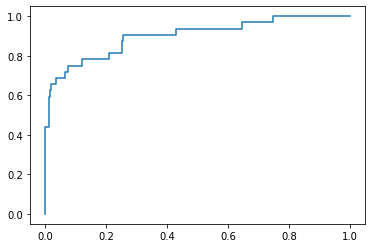

In [85]:
from sklearn import metrics

y_pred_proba = ks_model.predict_proba(X_test)[::,1]
fpr, tpr, dummy = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr)

#### Our second algorithm is is K-Nearest Neighbors. 

Though is it not required, we will fit a model using the training data and then test the performance of the model using the testing data. Start by loading `KNeighborsClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where k=3.

In [98]:
# Your code here:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

To test your model, compute the predicted values for the testing sample and print the confusion matrix as well as the accuracy score.

In [99]:
# Your code here:

y_expect = y_test
y_pred = neigh.predict(X_test)

#print(metrics.classification_report(y_expect, y_pred))
confusion_matrix(y_test, y_pred)

array([[259,   4],
       [ 13,  19]], dtype=int64)

#### We'll create another K-Nearest Neighbors model with k=5. 

Initialize and fit the model below and print the confusion matrix and the accuracy score.

In [96]:
# Your code here:
neigh2 = KNeighborsClassifier(n_neighbors=5)
neigh2.fit(X_train, y_train)

y_expect = y_test
y_pred = neigh2.predict(X_test)

print(metrics.classification_report(y_expect, y_pred))


              precision    recall  f1-score   support

           0       0.95      0.99      0.97       263
           1       0.86      0.56      0.68        32

    accuracy                           0.94       295
   macro avg       0.90      0.78      0.82       295
weighted avg       0.94      0.94      0.94       295



In [97]:
confusion_matrix(y_test, y_pred)

array([[260,   3],
       [ 14,  18]], dtype=int64)

Did you see an improvement in the confusion matrix when increasing k to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

In [ ]:
# Your conclusions here:



# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [ ]:
# Your code here